# **Proyek Pertama: Prediksi Biaya Asuransi Kesehatan**

Nama: Rizky Nur Afifah \\
Email: rizky.nur.afifah@mail.ugm.ac.id \\
Id Dicoding: rzknra

Berikut ini adalah langkah-langkah yang dilakukan dalam proyek ini.

## **Data Understanding**

Data yang digunakan dalam proyek ini merupakan data sekunder yang diperoleh dari Kaggle dengan nama *dataset* yaitu 'US Health Insurance Dataset'. Data tersebut dapat diakses melalui tautan berikut:
https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset.


Berdasarkan informasi di Kaggle, variabel-variabel pada *dataset* adalah sebagai berikut:
1. *age*: usia tertanggung asuransi (dalam satuan tahun).
2. *sex*: jenis kelamain tertanggung asuransi (*male* atau *famale*).
3. *bmi* (*body mass index*): nilai perbandingan antara berat badan dan kuadrat dari tinggi badan (dalam satuan $kg/m^2$).
4. *children*: jumlah anak yang ditanggung oleh penyedia asuransi kesehatan.
5. *smoker*: status merokok tertanggung asuransi (*yes* atau *no*).
6. *region*: daerah pemukiman tertanggung asuransi di US (meliputi  *southwest, southeast, northwest*, dan *northeast*).
7. *charges*: besar biaya asuransi yang dibebankan kepada tertanggung asuransi (dalam satuan dolar US $ $ $).




### Data Loading

Agar dataset lebih dipahami, perlu dilakukan Data Loading. Pertama, disiapkan terlebih dahulu library yang dibutuhkan.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Dataset yang digunakan disimpan di google drive. Untuk bisa mengakses dataset tersebut, terlebih dahulu dihubungkan google drive dan google colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kemudian data diunggah dari google drive ke google colab menggunakan kode berikut.

In [ ]:
insurance = pd.read_csv('/content/drive/MyDrive/IdCamp/Dataset/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dilakukan pengecekan dimensi dataset.

In [ ]:
insurance.shape

(1338, 7)

Berdasarkan output kode di atas, diketahui bahwa:

1. Ada 1.338 baris (jumlah pengamatan) dalam dataset.
2. Terdapat 7 kolom dalam dataset.

Selanjutnya, dilakukan pengecekan informasi dari dataset.

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Berdasarkan output kode di atas, diketahui bahwa:

1. Ada 3 kolom dengan tipe data object, yaitu sex, smoker, dan region.
2. Ada 2 kolom dengan tipe data float64, yaitu bmi dan charge.
3. Ada 2 kolom dengan tipe data int64, yaitu age dan children.

Kolom dengan tipe data object merupakan categorical features (fitur kategori atau fitur non numerik). Sedangkan, kolom kolom bertipe data float64 dan int64 (selain charge) merupakan fitur numerik. Adapun kolom charge adalah target dalam prediksi ini.

Selanjutnya, dilakukan pengecekan deskripsi statistik. Untuk fitur kategori, dilakukan  pengecekan nilai unik sebagai berikut.

In [ ]:
categorical_features = ['sex', 'smoker', 'region']

for feature in categorical_features:
  print(f"{feature} : {insurance[feature].unique()}")

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


Berdasarkan output kode di atas, diketahui bahwa:
1. kolom sex mempunyai nilai unik, yaitu female dan male
2. kolom smoker mempunyai nilai unik, yaitu yes dan no
3. kolom region mempunyai nilai unik, yaitu southwest, southeast, northwest, and northeast

Selanjutnya, menggunakan fungsi describe() dilakukan pengecekan deskripsi statistik untuk fitur numerik sebagai berikut.





In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Deskripsi statistik pada output kode di atas meliputi:
1. Count adalah jumlah sampel pada data.
2. Mean adalah nilai rata-rata.
3. Std adalah standar deviasi.
4. Min yaitu nilai minimum setiap kolom.
5. 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
6. 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
7. 75% adalah kuartil ketiga.
8. Max adalah nilai maksimum.

### Data Assesing

Dilakukan Data Assesing yang meliputi pengecekan data duplikat, missing value, dan outlier sebagai berikut.

#### Data Duplikat

In [ ]:
insurance.duplicated().sum()

1

In [ ]:
insurance[insurance.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
insurance = insurance.drop_duplicates()
insurance.shape

(1337, 7)

Berdasarkan output kode di atas, diketahui bahwa ada satu data yang mempunyai duplikat, yaitu data pada kolom index ke-195 sama dengan data pada kolom index ke-581. Oleh karena itu, digunakan fungsi drop_duplicates() untuk menghilangkan duplikat dari data tersebut sehingga diperoleh dataset insurance terdiri dari 1337 kolom.

#### Missing Value

Diimplementasikan kode berikut untuk mengecek total missing value pada setiap fitur.

In [ ]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Berdasarkan output kode di atas, diketahui bahwa tidak ada missing value pada dataset insurance.

#### Outliers

Selanjutnya, dilakukan pengecekan outlier pada setiap fitur dengan mengimplementasikan kode berikut.

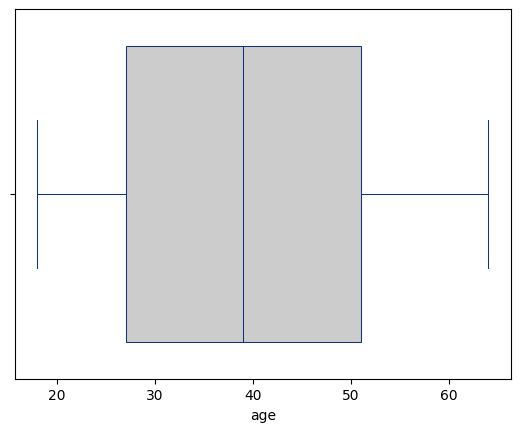

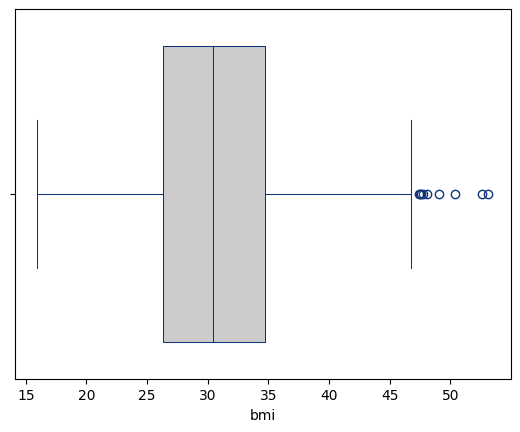

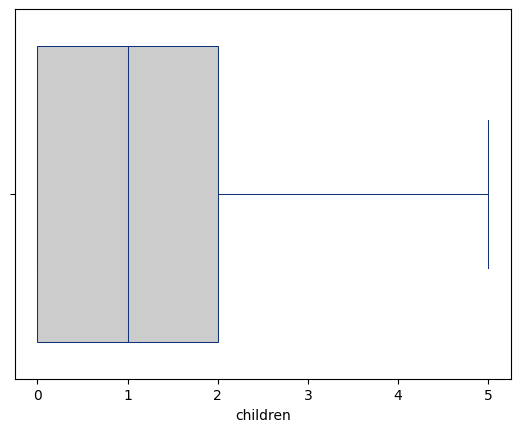

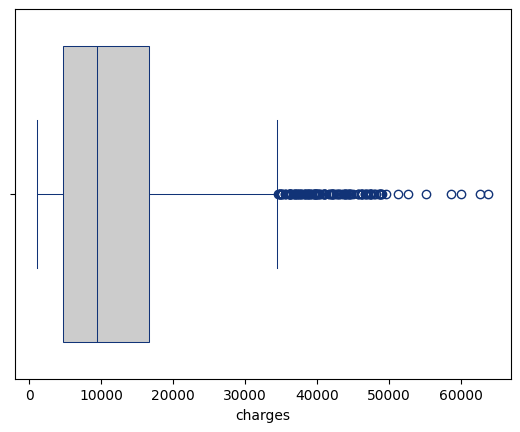

In [ ]:
numerical_features = ['age', 'bmi', 'children', 'charges']

for feature in numerical_features:
  plt.figure()
  sns.boxplot(data=insurance[numerical_features],
              x=feature, color=".8", linecolor="#137", linewidth=.75)

Berdasarkan output kode di atas, terlihat bahwa terdapat outliers pada data dari fitur 'bmi' dan 'charges'.

### Data Cleaning

Karena terdapat outlier pada data dari fitur 'bmi' dan 'charges', maka digunakan metode IQR untuk mengatasi outliers pada data dari kolom bmi, yaitu

$IQR = Q_3 - Q_1$

dengan:
*   $IQR$ = Inter Quartile Range
*   $Q_3$ = Quartile 3
*   $Q_1$ = Quartile 1

Diimplementasikan metode IQR ke dataset menggunakan kode berikut.



In [ ]:
Q1 = insurance[['bmi','charges']].quantile(0.25)
Q3 = insurance[['bmi','charges']].quantile(0.75)
IQR = Q3-Q1
insurance = insurance[~((insurance[['bmi','charges']]<(Q1-1.5*IQR))|(insurance[['bmi','charges']]>(Q3+1.5*IQR))).any(axis=1)]

insurance.shape

(1192, 7)

Setelah dilakukan metode IQR, diperoleh bahwa dataset insurance terbaru terdiri dari 1192 kolom.

### Analisis Univariat


Pada tahap ini dilakukan analisis univariat untuk mengetahui dan mengidentifikasi karakteristik dari setiap fitur.

a. Fitur Kategori

 Pertama dilakukan analisis univariat terhadap fitur kategori terlebih dahulu.

        jumlah sampel  persentase
female            611        51.3
male              581        48.7


<ipython-input-14-a9228bddac2d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance, x=feature, palette='rainbow').set(title=feature, xlabel='')


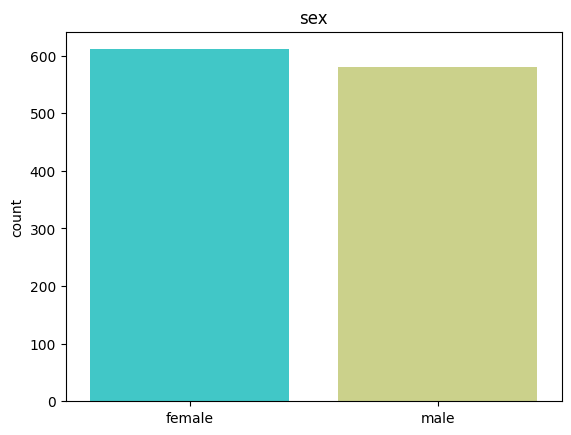

     jumlah sampel  persentase
no            1054        88.4
yes            138        11.6


<ipython-input-14-a9228bddac2d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance, x=feature, palette='rainbow').set(title=feature, xlabel='')


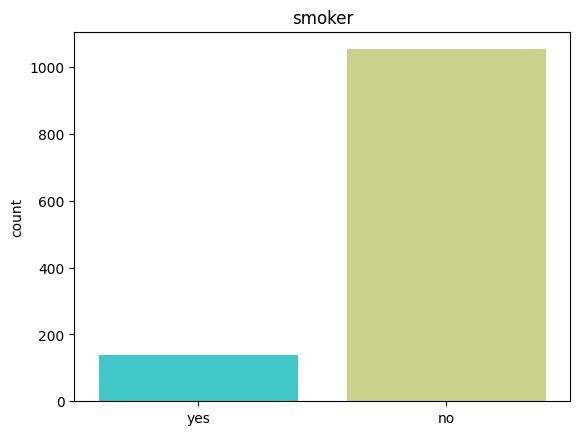

           jumlah sampel  persentase
northwest            304        25.5
southeast            302        25.3
northeast            295        24.7
southwest            291        24.4


<ipython-input-14-a9228bddac2d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance, x=feature, palette='rainbow').set(title=feature, xlabel='')


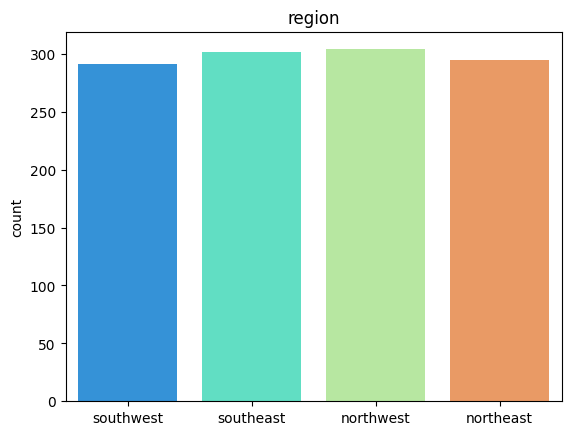

In [ ]:
for feature in categorical_features:
  count = insurance[feature].value_counts()
  percent = 100*insurance[feature].value_counts(normalize=True)
  df_categorical_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
  print(df_categorical_percent)

  sns.countplot(data=insurance, x=feature, palette='rainbow').set(title=feature, xlabel='')
  plt.show()

Berdasarkan output kode di atas, diperoleh bahwa:
1. Banyak tertanggung asuransi laki-laki dan perempuan hampir berimbang, yaitu 50.4% laki-laki dan 49.6% perempuan.
2. Sebagaian besar tertangggug asuransi bukan perokok. Hal ini terlihat dari sebanyak 79,6% tertanggung asuransi bukan perokok, sisanya sebesar 20,6% tertanggung asuransi merupakan perokok.
4. Banyak tertanggung asuransi yang tinggal pada tiap-tiap pemukiman hampir sama, yaitu 26.9% di southeast, 26.9% di southwest, 24.4% di northwest, dan 24.3% di northeast.

b. Fitur Numerik

Selanjutnya, dilakukan analisis univariat terhadap fitur numerik sebagai berikut.

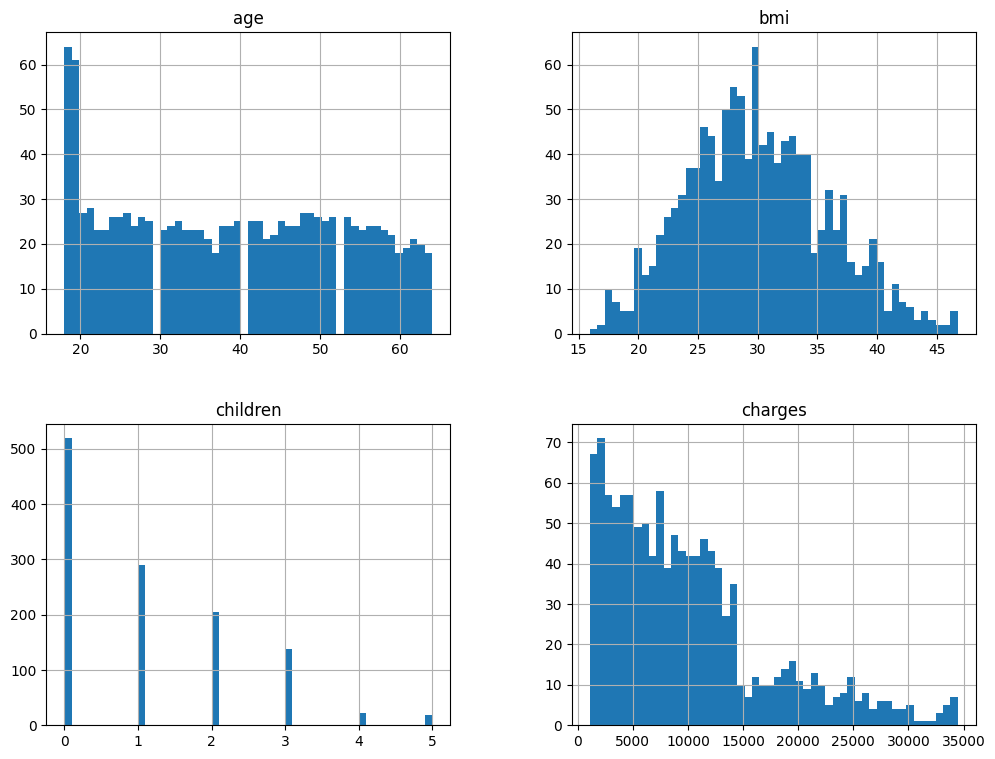

In [ ]:
insurance.hist(bins=50, figsize=(12,9))
plt.show()

Diperhatikan histrogram di atas, diperoleh bahwa:
1. Peningkatan nilai 'children' dan 'charges' sebanding dengan penurunan jumlah sampel. Hal ini terlihat dari histrogram 'children' dan 'charges' yang grafiknya mengalami penurunan seiring semakin banyaknya jumlah sampel.
2. Distribusi 'charges', 'age', dan 'children' miring ke kanan, sedangkan distribusi 'bmi' cenderung normal.
3. Rentang 'charges' cukup tinggi yaitu dari skala ratusan dolar amerika hingga sekitar $\$60000$.

### Analisis Multivariat

Berikut ini dilakukan analisis multivariat untuk menunjukkan hubungan antara dua atau lebih fitur pada data. Analsis multivariat yang dilakukan di sini akan lebih berfokus untuk mengetahui hubungan antara fitur target 'charges' dengan fitur-fitur lainnya.

a. Fitur Kategori

Pertama, dilakukan pengecekan rata-rata 'charges' terhadap fitur kategori untuk mengetahui pengaruh fitur kategori terhadap 'charges'.

<ipython-input-16-0ef52446c4ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y="charges", kind="bar", data=insurance, palette='rainbow')
<ipython-input-16-0ef52446c4ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y="charges", kind="bar", data=insurance, palette='rainbow')
<ipython-input-16-0ef52446c4ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y="charges", kind="bar", data=insurance, palette='rainbow')


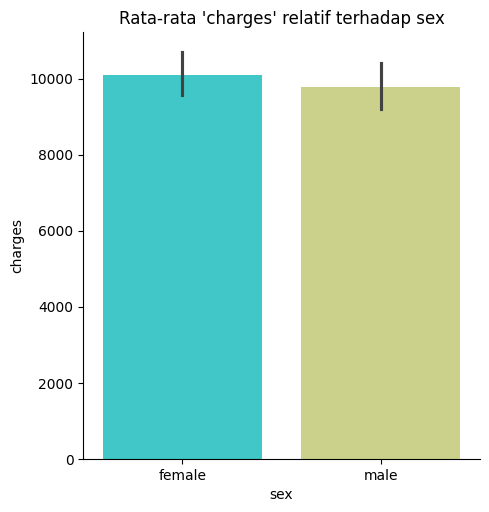

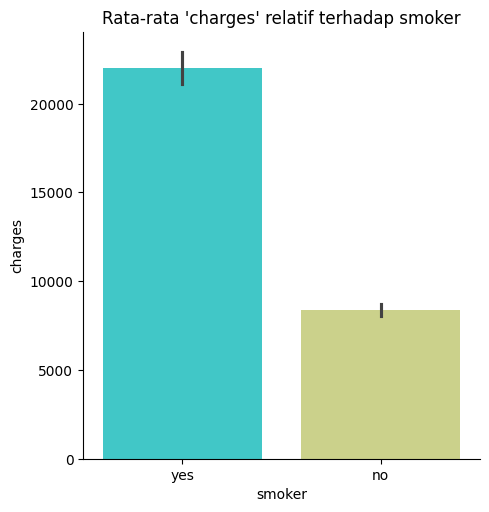

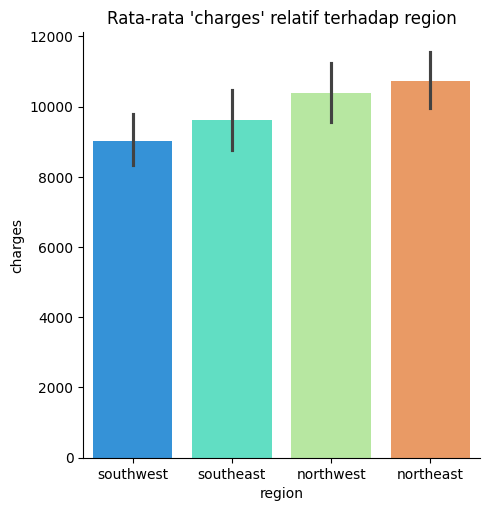

In [ ]:
for feature in categorical_features:
  sns.catplot(x=feature, y="charges", kind="bar", data=insurance, palette='rainbow')
  plt.title(f"Rata-rata 'charges' relatif terhadap {feature}")

Berdasarkan out kode di atas, diperoleh bahwa:
1. Pada fitur 'sex', rata-rata 'charges' yang dikenakan terhadap 'male' dan 'female' cenderung mirip. Rentangnya berada antara  \$12000  sampai \$15000 . Dengan demikian, fitur 'sex' mempunyai pengaruh kecil terhadap rata-rata 'charges'.
2. Pada fitur 'smoker', rata-rata 'charges' untuk 'smoker' jauh lebih besar dibandingkan untuk 'non smoker'. Dengan demikian, fitur 'smoker' mempunyai pengaruh besar terhadap rata-rata 'charges'.
3. Pada fitur 'region', rata-rata 'charges' yang dikenakan terhadap masing-masing region cenderung mirip. Rentangnya berada antara  \$12000  sampai \$16000 . Dengan demikian, fitur 'region' mempunyai pengaruh kecil terhadap rata-rata 'charges'.
4. Karena fitur 'sex' dan 'region' mempunyai pengaruh kecil terhadap rata-rata 'charges', maka kedua fitur tersebut bisa dihilangkan sehingga hanya tersisa fitur 'smoker' untuk fitur kategori.

Kode di bawah ini digunakan untuk menghilangkan fitur 'sex' dan 'region'.

In [ ]:
insurance.drop(['sex','region'], axis=1, inplace=True)
insurance.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


b. Fitur Numerik

Selanjutnya, dilakukan analisis multivariat untuk fitur numerik sebagai berikut.

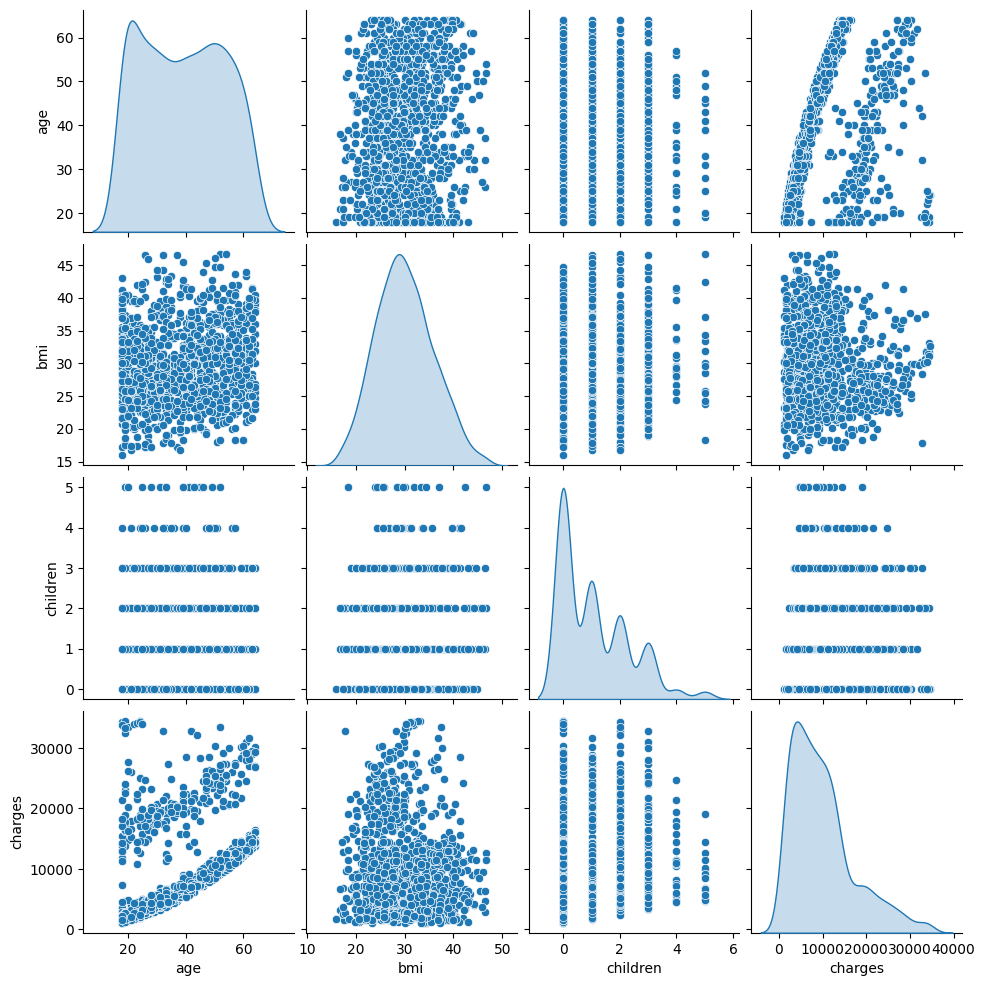

In [ ]:
sns.pairplot(insurance, diag_kind = 'kde')
plt.show()

Untuk membaca pairplot di atas, perhatikan fitur target 'charges' pada sumbu y. Terlihat bahwa fitur 'age' mempunyai korelasi positif dengan fitur 'price'. Sedangkan, fitur 'bmi' dan 'children' tidak mempunyai korelasi dengan fitur 'price'.

Lebih lanjut, dilakukan pengecekan nilai korelasi antar fitur numerik menggunakan correlation matrix sebagai berikut.

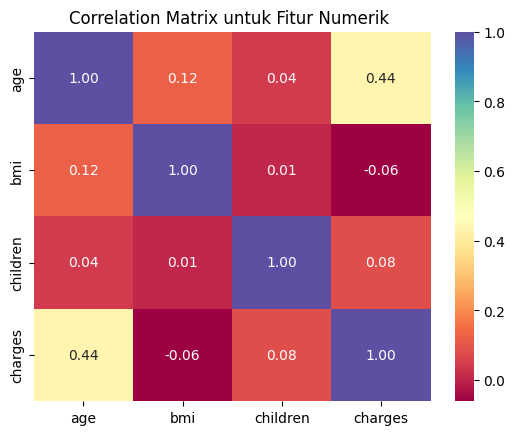

In [ ]:
correlation_matrix = insurance[['age', 'bmi', 'children','charges']].corr()

sns.heatmap(data=correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title("Correlation Matrix untuk Fitur Numerik ")
plt.show()

Berdasarkan  output kode di atas, diperoleh bahwa fitur 'age' mempunyai korelasi yang cukup besar dengan fitur 'charges', sedangkan fitur 'bmi' dan 'children' mempunyai korelasi kecil dengan fitur 'charges'. Oleh karena itu, fitur 'bmi' dan 'children' bisa di-drop.

In [ ]:
insurance.drop(['children','bmi'], axis=1, inplace=True)
insurance.head()

,age,smoker,charges
0,19,yes,16884.92400
1,18,no,1725.55230
2,28,no,4449.46200
3,33,no,21984.47061
4,32,no,3866.85520


## **Data Preparation**

Pada proses data preparation ini, dilakukan:
1. Encoding fitur kategori.
2. Pembagian dataset menjadi data latih dan data uji.
3. Scaling fitur numerik.

### Encoding

Encoding dilakukan terhadap fitur kategori, yaitu 'smoker'. Salah satu teknik umum yang digunakan untuk encoding yaitu label encoding. Dilakukan label encoding dengan mengimplementasikan kode berikut.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
insurance['smoker'] = label_encoder.fit_transform(insurance['smoker'])
insurance.head()

,age,smoker,charges
0,19,1,16884.92400
1,18,0,1725.55230
2,28,0,4449.46200
3,33,0,21984.47061
4,32,0,3866.85520


Dari sini, diperoleh bahwa fitur kategori sudah berubah menjadi fitur numerik.

### Pembagian Dataset menjadi Data Latih dan Data Uji

Selanjutnya, dilakukan pemisahan dataaset dengan proporsi $80\%$ data pelatihan dan $20\%$ data validasi/test. Untuk itu, diimplementasikan kode berikut.

In [ ]:
X = insurance.drop(['charges'], axis=1)
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Total sample of whole dataset: {len(X)}')
print(f'Total sample of train dataset: {len(X_train)}')
print(f'Total sample of test dataset: {len(X_test)}')

Total sample of whole dataset: 1192
Total sample of train dataset: 953
Total sample of test dataset: 239


### Scaling

Pada proses scaling ini, digunakan teknik MixMaxScaler dari library ScikitLearn. MinMaxScaler melakukan standardisasi dengan mengurangkan nilai data, lalu membaginya dengan selisih dari nilai minimum dan nilai maksimum data, yaitu

$x = \frac{x - x_{min}}{x_{max} - x_{min}}$

dengan:
* $x$ = nilai data yang di-scaling
* $x_{min}$ = nilai data minimum dari keseluruhan data pada fitur
* $x_{min}$ = nilai data maksimum dari keseluruhan data pada fitur


In [ ]:
numerical_features = ['age']

scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])

X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age
253,0.195652
778,0.369565
735,0.673913
483,0.717391
877,0.326087


## **Model Development**

Pada tahap ini, dilakukan pengembangan model machine learning dengan menggunakan dua algoritma, yaitu
1. Random Forest.
2. XGBoost.

Lebih lanjut, akan dilakukan hyperparameter tuning menggunakan teknik GridSearchCv pada masing-masing algoritma tersebut sehingga total ada empat model yang akan dibuat, yaitu:
1. RF1 = Random Forest.
2. RF2 = Random Forest with hyperparameter tuning.
3. XGB1 = XGBoost.
4. XGB2 = XGBoost with hyperparameter tuning.

### 1. Random Forest

Terlebih dahulu dibangun algoritma random forest sebagai berikut.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF1 = RandomForestRegressor(random_state=123)
RF1.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

### Random Forest with Tuning

Untuk meningkatkan performa model Random Forest. Selanjutnya, dilakukan hyperparameter tuning terhadap algoritma random forest dengan menggunakan kelas GridSearchCV. Hyperparameter yang di-tuning, yaitu:
1. max_depth: kedalaman atau panjang pohon, yang berarti ukuran seberapa banyak pohon dapat membelah (*splitting*) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
2. min_samples_leaf: jumlah minimum sampel yang diperlukan untuk berada di *leafs* (daun).
3. mis_samples split: jumlah minimum sampel yang diperlukan untuk membagi node internal.
4. n_estimator: jumlah *trees* (pohon) di forest.


In [ ]:
param_grid_rf = {'n_estimators' : [50,75,100],
          'max_depth' : [3,5,10,15],
           'min_samples_split':[2,3,4,5],
            'min_samples_leaf': [2,3,4,5]}

grid_rf = GridSearchCV(RF1, param_grid_rf, cv = 10, scoring = 'neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 75, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
best_params_rf = grid_rf.best_params_

max_depth_rf = best_params_rf['max_depth']
min_samples_leaf_rf = best_params_rf['min_samples_leaf']
min_samples_split_rf = best_params_rf['min_samples_split']
n_estimators_rf = best_params_rf['n_estimators']

print("optimal parameter for Random Forest algorithm:")
print(f"1. max_depth = {max_depth_rf}")
print(f"2. min_samples_leaf = {min_samples_leaf_rf}")
print(f"3. min_samples_split = {min_samples_split_rf}")
print(f"4. n_estimators = {n_estimators_rf}")

optimal parameter for Random Forest algorithm:
1. max_depth = 3
2. min_samples_leaf = 5
3. min_samples_split = 2
4. n_estimators = 100


Oleh karena itu, kemudian dibangun algoritma Random Forest dengan nilai hyperparameter hasil tuning tersebut sebagai berikut.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF2 = RandomForestRegressor(random_state=12,
                            max_depth=max_depth_rf,
                            min_samples_leaf=min_samples_leaf_rf,
                            min_samples_split=min_samples_split_rf,
                            n_estimators=n_estimators_rf)
RF2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=5, random_state=12)

### 2. XGBoost

Selanjutnya, dibangun algoritma XGBoost sebagai berikut.

In [ ]:
from xgboost import XGBRegressor

XGB1 = XGBRegressor()
XGB1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### XGBoost With Tuning

Untuk meningkatkan performa algoritma CGBoost. Selanjutnya, dilakukan hyperparameter tuning pada algoritma XGBoost dengan menggunakan teknik GridSearchCV. Hyperparameter yang di-tuning, yaitu:
1. n_estimator: jumlah trees (pohon) di forest.
2. learning_rate: learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
2. max_depth: kedalaman atau panjang pohon, yang berarti ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.


In [ ]:
param_grid = {'n_estimators': [50, 100, 300, 500],
    'learning_rate': [0.1, 0.01, 0.05, 0.001],
    'max_depth': [3, 5, 7, 9]}

grid = GridSearchCV(XGB1, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 300, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params_xgb = grid.best_params_

In [ ]:
learning_rate_xgb = best_params_xgb['learning_rate']
max_depth_xgb = best_params_xgb['max_depth']
n_estimators_xgb = best_params_xgb['n_estimators']

print("optimal parameter for XGBoost algorithm:")
print(f"1. learning_rate = {learning_rate_xgb}")
print(f"2. max_depth = {max_depth_xgb}")
print(f"3. n_estimators = {n_estimators_xgb}")

optimal parameter for XGBoost algorithm:
1. learning_rate = 0.01
2. max_depth = 3
3. n_estimators = 300


Oleh karena itu, kemudian dibangun algoritma XGBoost dengan nilai hyperparameter hasil tuning sebagai berikut.

In [ ]:
XGB2 = XGBRegressor(learning_rate= learning_rate_xgb,
                    max_depth=max_depth_xgb,
                    n_estimators=n_estimators_xgb)
XGB2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## **Evaluasi Model**

Pada tahap ini, dilakukan evaluasi model dengan menggunakan beberapa metrik evaluasi, yaitu:
1. Mean Squarred Error (MSE)
2. Mean Absolute Error (MAE)
3. R-Squarred ($R^2$)

Namun, sebelum itu perlu dilakukan scaling terhadap data uji terlebih dahulu dengan mengimplementasikan kode berikut.

In [ ]:
X_test[numerical_features] = scaler.transform(X_test.loc[:,numerical_features])

### Mean Squarred Error (MSE)

Pertama, model dievalusi menggunakan metrik evaluasi mse. Terlebih dahulu, dibuat dataframe yang menampung nilai mse setiap model sebagai berikut.

In [ ]:
mse_models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['RF1','RF2','XGB1', 'XGB2'])

Selanjutnya, dilakukan evaluasi model menggunkakan metrik mse dengan mengimplementasikan kode berikut.

In [ ]:
model_dict = {'RF1': RF1, 'RF2': RF2, 'XGB1': XGB1, 'XGB2':XGB2}

for name, model in model_dict.items():
    mse_models.loc[name, 'train_mse'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse_models.loc[name, 'test_mse'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse_models

,train_mse,test_mse
RF1,18539.629704,25282.763885
RF2,19569.464765,24324.410399
XGB1,18499.8497,25967.960248
XGB2,19318.476753,23633.954472


Diperoleh nilai mse dari masing-masing algoritma sebagaimana tercantum pada tabel di atas. Untuk melihat perbandingan mse secara lebih jelas, dilakukan visualisasi dengan mengimplementasikan kode berikut.

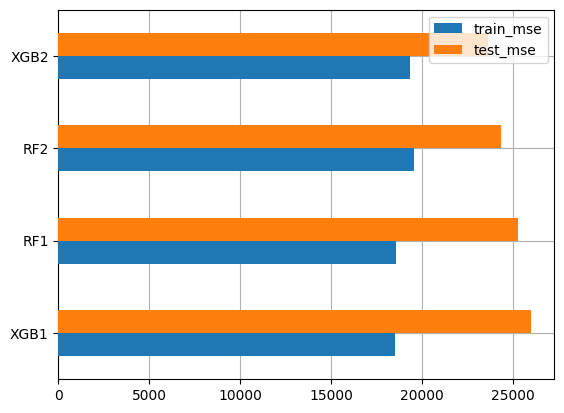

In [ ]:
fig, ax = plt.subplots()
mse_models.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=4)
ax.grid(zorder=0)

Berdasarkan output kode di atas, diperoleh bahwa model RF2 dan XGB2 mempunyai nilai 'test_mse' yang lebih rendah dibandingkan kedua model lainnya. Dilain hal, selisih nilai 'test_mse' dan 'train_mse' pada model RF2 dan XGB2 lebih kecil dibandingkan dua model lainnya, yang berarti kedua model tidak terlalu overfitting.  

### Mean Absolute Error (MAE) and $R^{2}$

Selanjutnya, dilakukan evaluasi model dengan menggunakan metrik evaluasi lainnya, yaitu mean absolute error (mae) dan $R^2$, dengan mengimplementasikan kode berikut.

In [ ]:
def metrics_eval_mae_r2(name, key, arg):
    print('Name of the model:',name)
    print('MAE of the model:',mean_absolute_error(key, arg))
    print('R^2 of the model:',r2_score(key, arg))
    print('\n')

y_RF1 = RF1.predict(X_test)
y_RF2 = RF2.predict(X_test)
y_XGB1 = XGB1.predict(X_test)
y_XGB2 = XGB2.predict(X_test)

metrics_eval_mae_r2('RF1', y_test, y_RF1)
metrics_eval_mae_r2('RF2', y_test, y_RF2)
metrics_eval_mae_r2('XGB1', y_test, y_XGB1)
metrics_eval_mae_r2('XGB2', y_test, y_XGB2)

Name of the model: RF1
MAE of the model: 2922.9584113729475
R^2 of the model: 0.5660674252523771


Name of the model: RF2
MAE of the model: 2897.073605878178
R^2 of the model: 0.5825158166395445


Name of the model: XGB1
MAE of the model: 2948.621166460513
R^2 of the model: 0.5543072781685672


Name of the model: XGB2
MAE of the model: 2848.303577468292
R^2 of the model: 0.5943662345615008




Berdasarkan output kode di atas, diperoleh bahwa model RF2 dan XGB2 mempunyai nilai mae lebih rendah dan nilai $R^2$ lebih tinggi dibandingkan dua model lainnya.


Selanjutnya, dilakukan pengujian model dengan menggunakan salah satu baris data pada data uji sebagai berikut.

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF1,prediksi_RF2,prediksi_XGB1,prediksi_XGB2
1029,6877.9801,8472.5,7024.5,8458.5,7274.700195


Berdasarkan output kode di atas, terlihat bahwa model RF2 dan XGB2 memberikan hasil yang paling mendekati y_true (nilai asli).

Dengan demikian, berdasarkan nilai metrik evaluasi mse, mae, dan $R^2$ dan hasil pengujian di atas, diperoleh model RF2 (Random Forest with Hyperparameter Tuning) dan XGB2 (XGBoost with hyperparameter tuning) menjadi model terbaik untuk prediksi biaya asuransi kesehatan.